# Milestone 01
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Problem

Identify the most important features in the diaper manufacturing process that result in the production of the desired quality of diaper.

## Step 1: Refine your data understanding and prepare a DFD of solving the manufacturing quality problem

Didn't give myself enough time to get to this.

## Step 2: Read & Merge Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import requests
import re

def prepare(dataFilename = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data", labelsFilename="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"):
    names = ["f" + str(x) for x in range(1, 591)]
    
    data = pd.read_csv(dataFilename, names=names, delimiter=' ', header=None)    
    labels = pd.read_csv(labelsFilename, delimiter=' ', header=None, names = ["class","date"], parse_dates = ["date"])
    
    merged = pd.merge(data, labels,left_index=True,right_index=True)
    
    return merged

secom_raw = prepare()
print('Read & Merged ...')

Read & Merged ...


In [3]:
secom_raw.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f583,f584,f585,f586,f587,f588,f589,f590,class,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


## Step 3: Clean and Prepare Data 

#### Drop Date Column

The date column isn't relevant to our analysis

In [4]:
secom_raw.drop(columns=['date'], axis=1, inplace = True)

#### Drop Columns w/ > 40% Missing Data

In [5]:
cols_with_missing = secom_raw.columns[(secom_raw.isnull().sum() /  secom_raw.shape[0]) > .4]
secom_raw.drop(columns=cols_with_missing, axis=1, inplace = True)

#### Drop Columns w/ One Value

In [6]:
const_cols = [] # data.columns[data.value_counts().count() == 1]
nFeatures = secom_raw.columns.size - 1
for c in secom_raw.columns:
    if secom_raw[c].value_counts().count() <= 1:
        const_cols.append(c)

secom_raw.drop(columns=const_cols, axis=1, inplace = True)   

#### Impute Numeric Columns w/ Mean

In [8]:
secom = secom_raw.fillna(secom_raw.mean())

## Step 4: Visually Explore Data

#### Distributional Observations

Done Generating Plot...Wait for Rendering...


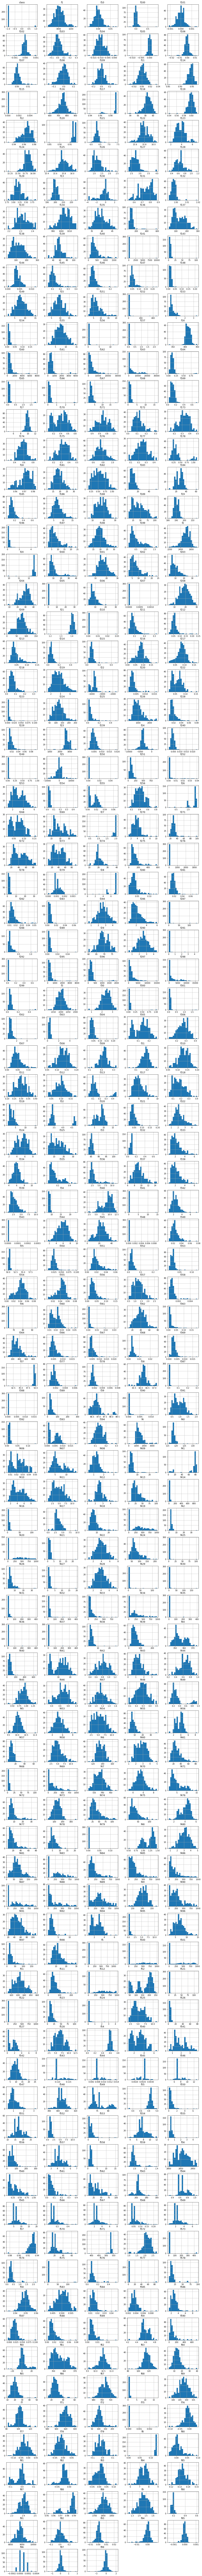

In [103]:
secom.sample(n=300).hist(bins=22,figsize=(18, 250),layout=(90,5));
print('Done Generating Plot...Wait for Rendering...')

#### Observations

* There are numberous variables that have close to a normal distribution, which can make for good features.
* There are distributions that skew left or right that can be transformed to provide better potential
* There are several multi-modal distributions
* Most of the rest of the variables have distributions with near 0 variance, but that's not necessarily cause
  to drop them because they may have everything to do with the failures of which there is very few.

#### Relationships

Now let's take an even closer look at potential relationships between our taget and our feature variables using box plots.

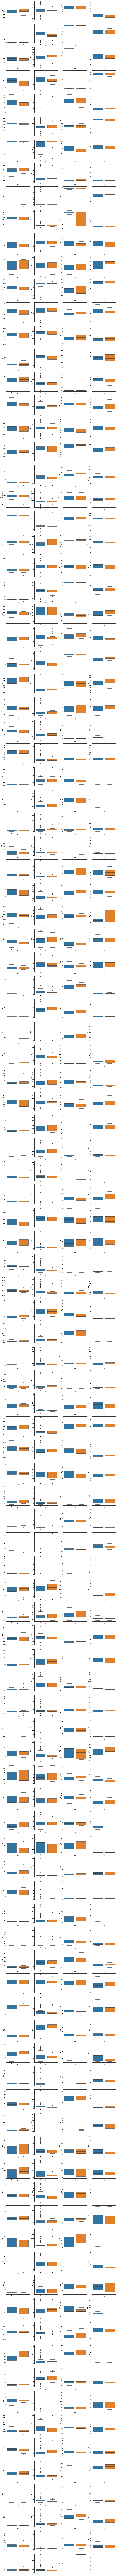

In [115]:
fig, ax = plt.subplots(111, 4, figsize=(25, 600))
for var, subplot in zip(secom.columns, ax.flatten()):
    sns.boxplot(x='class', y=var, data=secom.sample(300), ax=subplot)

#### Observations

I don't see any knockdown candidates for features because the IQR in the box plots above all overlap to a degree. There are some features like f546 or f456 where the median or passing or failing doesn't appear to overlap with the IQR of the other, but further statistical tests would need to be applied to determine significance.

## Step 5: Handle Class Imbalance Problem

In [9]:
!pip install imblearn

     |████████████████████████████████| 163 kB 2.6 MB/s eta 0:00:01


#### Is There a Problem?

In [10]:
secom['class'].value_counts()

-1    1463
 1     104
Name: class, dtype: int64

We can see from the counts above that there are far more passes than failures and so have a class imbalance problem.

#### SMOTE The Training Data

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

X_train, X_test, y_train, y_test = train_test_split(secom.drop(columns = 'class'), 
                                                    secom['class'], 
                                                    test_size = 0.20, 
                                                    random_state = 42)

sm = SMOTE(random_state = 42)
X_res_train, y_res_train = sm.fit_sample(X_train, y_train)
print('Done Smoting...')

Done Smoting...


## Step 6: Apply feature selection techniques to reduce dimensionality of data

### Pearson's Correlation Coefficient

In [12]:
merged = pd.merge(X_res_train,y_res_train,left_index=True,right_index=True)

corrs = merged.corr(method = 'pearson').round(4)
corrs = corrs.sort_values(by=['class'], ascending=False)
corrs['class'].head(10)

class    1.0000
f104     0.3415
f60      0.3294
f130     0.2558
f511     0.2533
f349     0.2101
f65      0.2084
f80      0.2066
f131     0.1971
f64      0.1890
Name: class, dtype: float64

It looks like Pearson's Correlation Coefficient is going to be a dead end because the highest value the correlates positively is pretty low.

#### Backward Selection

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_res_train = sc.fit_transform(X_res_train)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


est = LogisticRegression(max_iter=200)
rfecv = RFECV(estimator=est, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X_res_train, y_res_train)        

print('Done Regressing...')

Done Regressing...


Optimal number of features : 158


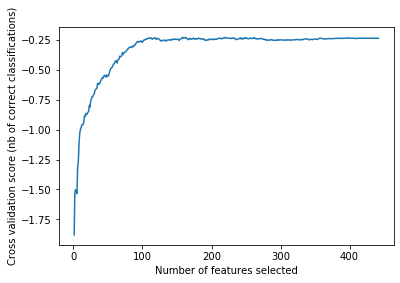

In [131]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Selected Features

In [138]:
secom.drop(columns = 'class').columns[rfecv.support_]

Index(['f1', 'f7', 'f20', 'f23', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31',
       ...
       'f544', 'f561', 'f562', 'f563', 'f564', 'f568', 'f574', 'f576', 'f588',
       'f589'],
      dtype='object', length=158)

#### Compare Predections

In [141]:
yhat_backward = rfecv.predict(X_test)
est = est.fit(X_res_train, y_res_train)
yhat_estimator = est.predict(X_test)
np.corrcoef([yhat_backward, yhat_estimator, y_test])

array([[1.00000000e+00, 4.64525797e-01, 4.74016346e-02],
       [4.64525797e-01, 1.00000000e+00, 5.54079974e-04],
       [4.74016346e-02, 5.54079974e-04, 1.00000000e+00]])

### Forward Selection

In [14]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.1 MB/s eta 0:00:01


In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

est = LogisticRegression()

stepwise_selector = SFS(est, 
    k_features = "parsimonious", 
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    cv = 5)

stepwise_selector = stepwise_selector.fit(X_res_train, y_res_train)
print("Forward Selection Done ....")

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err',figsize=(20, 12))
plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
stepwise_selector.get_metric_dict()

#### Lasso Regression

In [ ]:
from sklearn import linear_model

alpha = 0.001 # increasing alpha can shrink more variable coefficients down to 0
clf = linear_model.Lasso(alpha = alpha)
clf.fit(X_res_train, y_res_train);

In [ ]:
dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
plt.figure(figsize=(25,10))
ax = sns.barplot(x = 'col', y = 'coef', data = dd)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
for alpha in np.arange(0.0001, 5, .01):
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(X_res_train, y_res_train)
    dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)
    
print('Done Lassoing....')

In [ ]:
results.head()

## What are your initial findings? Describe them in a summary section

* Pearson's Correlation Coefficient was not effective in selecting features.
* Back Selection using logistic regression as our estimator recommends 158 features.
* Forward Selection just would not finish running.... so I'm not sure.
* Forward Selection didn't finish so I couldn't get to Lasso. Next time.